In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import scipy.stats as sts

# Jumping game

This question comes from an interview, and it is a verification of the Central Limit Theorem.

You jump $n$ times, either of 1 or 2. Compute the expected final position.

It is basically the computation of $\mathbb E[Y:=\sum_{i=1}^n X_i]$, where $X_i=\{1,2\}$. Since $X_i$'s are iid with $\mu=\mathbb [X_i]=1.5$ and $\sigma^2=\mathbb V[X_i]=\mathbb [X_i^2]-\mu^2=0.25$, one should verify that the final distribution converges to $\mathcal N(n\mu,n\sigma^2)$, that is what we see.

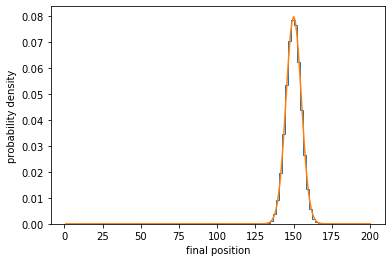

In [17]:
n_games = 200000
n_jumps = 100

mean = 0.5*1+0.5*2
vari = 0.5*1+0.5*2**2-mean**2

positions = []
for j in tqdm(range(n_games),desc='jumping {} times'.format(n_jumps),unit=' games',leave = False):
    positions.append(sum(np.random.randint(1,3,n_jumps)))
    
plt.hist(positions, bins=n_jumps, density=True, range=(1,2*n_jumps), histtype='step')
plt.plot(np.linspace(1,n_jumps*2,n_jumps*2), sts.norm.pdf(np.linspace(1,n_jumps*2,n_jumps*2), loc=n_jumps*mean, scale=np.sqrt(n_jumps*vari)))
plt.xlabel('final position')
plt.ylabel('probability density')
plt.show()

One may think this:

0. consider the basic random walk $S_n:=\sum_{i=1}^n X_i$, where $X_n=\{-1,1\}$. We know $\mathbb E[S_n]=0$ and $\mathbb V[S_n] = n$.
1. define the random variable $Y:=0.5X+1.5$. Clearly our game consists in computing the distribution of $\sum_{i=1}^n Y_i$.
2. But:
    $$ \sum_{i=1}^n Y_i = \sum_{i=1}^n (0.5X_i+1.5) = 0.5\sum_{i=1}^n X_i+1.5n 
    \Rightarrow \mathbb E[\sum_{i=1}^n Y_i] = 1.5n,\,\mathbb V[\sum_{i=1}^n Y_i] = 0.5^2 \mathbb V[\sum_{i=1}^n X_i] = 0.25n,$$
   that is what was observed.